***Data Collection & Preprocessing***

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import fetch_california_housing

In [6]:
california_housing =fetch_california_housing()
print(california_housing.data.shape)

(20640, 8)


In [7]:
print(california_housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [8]:
print(california_housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [11]:
print(california_housing.target.shape)

(20640,)


In [14]:
print( pd.Series(california_housing.target.shape).describe())

count        1.0
mean     20640.0
std          NaN
min      20640.0
25%      20640.0
50%      20640.0
75%      20640.0
max      20640.0
dtype: float64


In [15]:
print(len(california_housing.feature_names))

8


In [17]:
print(", ".join(california_housing.feature_names))

MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude


In [18]:
print(california_housing.target.dtype)

float64


**Descriptives**

In [32]:
print('Mean:')
print(np.mean(california_housing.target))
print(pd.Series(california_housing.target).mean())

print('Median:')
print(np.median(california_housing.target))
print(pd.Series(california_housing.target).median())

print('Mode: only using pandas. Numpy does not have mode()')
print(pd.Series(california_housing.target).mode())

Mean:
2.068558169089147
2.068558169089147
Median:
1.797
1.797
Mode: only using pandas. Numpy does not have mode()
0    5.00001
dtype: float64


In [35]:
print(np.max(california_housing.target)-min(california_housing.target))
print(np.var(california_housing.target))
print(np.std(california_housing.target))

4.85002
1.3315503000818076
1.1539282040412253


In [39]:
corr=pd.DataFrame(california_housing.data).corr()
print(corr)

          0         1         2         3         4         5         6  \
0  1.000000 -0.119034  0.326895 -0.062040  0.004834  0.018766 -0.079809   
1 -0.119034  1.000000 -0.153277 -0.077747 -0.296244  0.013191  0.011173   
2  0.326895 -0.153277  1.000000  0.847621 -0.072213 -0.004852  0.106389   
3 -0.062040 -0.077747  0.847621  1.000000 -0.066197 -0.006181  0.069721   
4  0.004834 -0.296244 -0.072213 -0.066197  1.000000  0.069863 -0.108785   
5  0.018766  0.013191 -0.004852 -0.006181  0.069863  1.000000  0.002366   
6 -0.079809  0.011173  0.106389  0.069721 -0.108785  0.002366  1.000000   
7 -0.015176 -0.108197 -0.027540  0.013344  0.099773  0.002476 -0.924664   

          7  
0 -0.015176  
1 -0.108197  
2 -0.027540  
3  0.013344  
4  0.099773  
5  0.002476  
6 -0.924664  
7  1.000000  


In [47]:
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
features=df
targets=pd.Series(california_housing.target, name="Median House Value")
data_with_target=pd.concat([features, targets], axis=1)
correa=data_with_target.corr()
print(correa.iloc[:,-1])

MedInc                0.688075
HouseAge              0.105623
AveRooms              0.151948
AveBedrms            -0.046701
Population           -0.024650
AveOccup             -0.023737
Latitude             -0.144160
Longitude            -0.045967
Median House Value    1.000000
Name: Median House Value, dtype: float64


In [52]:
missing=df.isnull().sum()
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [53]:
features_missing=missing[missing>0]
print(features_missing)

Series([], dtype: int64)


In [56]:
dummy_data = pd.Series([1, 2, 3, None, 5, 6, None, 8, 9, None])
missing_dummy=dummy_data.isnull().sum()
print(missing_dummy)
dummy_mean=np.mean(dummy_data)
print(dummy_mean)
filled=dummy_data.fillna(dummy_mean)
print(filled)

3
4.857142857142857
0    1.000000
1    2.000000
2    3.000000
3    4.857143
4    5.000000
5    6.000000
6    4.857143
7    8.000000
8    9.000000
9    4.857143
dtype: float64


In [64]:
z_Scores=np.abs((df[['MedInc']]-df[['MedInc']].mean())/df[['MedInc']].std())
outliers=z_Scores[z_Scores>3]
out=df[np.any(z_Scores>3, axis=1)]
print("First")
print(outliers)
print("2nd")
print(out)


First
       MedInc
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
...       ...
20635     NaN
20636     NaN
20637     NaN
20638     NaN
20639     NaN

[20640 rows x 1 columns]
2nd
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
409    10.0825      52.0  8.209016   1.024590       658.0  2.696721     37.90   
510    11.8603      39.0  7.911111   0.984127       808.0  2.565079     37.82   
511    13.4990      42.0  8.928358   1.000000      1018.0  3.038806     37.82   
512    12.2138      52.0  9.210227   1.039773      1001.0  2.843750     37.82   
...        ...       ...       ...        ...         ...       ...       ...   
20376  10.2614      16.0  6.421277   0.919149       578.0  2.459574     34.16   
20380  10.1597      16.0  7.606936   1.121387       450.0  2.601156     34.14   
20389  10.0595      26.0  8.692308   1.076923       573.0  3.148352

In [63]:
print("3rd")
print(out[['MedInc']])

3rd
        MedInc
131    11.6017
409    10.0825
510    11.8603
511    13.4990
512    12.2138
...        ...
20376  10.2614
20380  10.1597
20389  10.0595
20426  10.0472
20436  12.5420

[345 rows x 1 columns]


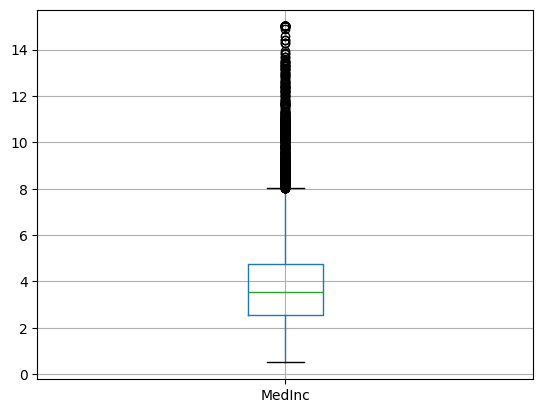

In [68]:
%matplotlib inline
df[['MedInc']].boxplot()
plt.show()

In [70]:
print(california_housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


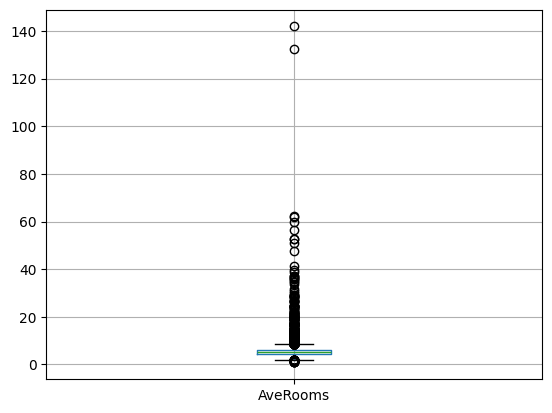

In [71]:
%matplotlib inline
df[['AveRooms']].boxplot()
plt.show()

In [74]:
Nikamme = df[~np.any(z_Scores > 3, axis=1)]
print(Nikamme)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [75]:
categorical_features = df.columns[df.nunique() < 5]
print(categorical_features)

Index([], dtype='object')


In [76]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print(df_encoded)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [83]:
#label_encoder = LabelEncoder()
#df[df_encoded] = label_encoder.fit_transform(df[categorical_features])

In [104]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
california_housing=fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
from sklearn.preprocessing import StandardScaler

features_to_scale = ['MedInc']
scaler = StandardScaler()
scaler.fit(df[features_to_scale])
df[features_to_scale] = scaler.transform(df[features_to_scale])
df[features_to_scale].describe()

,MedInc
count,2.064000e+04
mean,6.609700e-17
std,1.000024e+00
min,-1.774299e+00
25%,-6.881186e-01
50%,-1.767951e-01
75%,4.593063e-01
max,5.858286e+00


In [113]:
scaler = StandardScaler().fit(df[['MedInc']])
df['MedInc']=scaler.transform(df[['MedInc']])
df['MedInc'].describe()

count    2.064000e+04
mean    -1.652425e-17
std      1.000024e+00
min     -1.774299e+00
25%     -6.881186e-01
50%     -1.767951e-01
75%      4.593063e-01
max      5.858286e+00
Name: MedInc, dtype: float64

In [114]:
StandardScaler().fit_transform(df[['MedInc']])
df['MedInc'].describe()

count    2.064000e+04
mean    -1.652425e-17
std      1.000024e+00
min     -1.774299e+00
25%     -6.881186e-01
50%     -1.767951e-01
75%      4.593063e-01
max      5.858286e+00
Name: MedInc, dtype: float64

In [124]:
MinMaxScaler().fit_transform(df[['MedInc']])
df['MedInc'].describe()

count    20640.000000
mean         0.232464
std          0.131020
min          0.000000
25%          0.142308
50%          0.209301
75%          0.292641
max          1.000000
Name: MedInc, dtype: float64

In [125]:
RobustScaler().fit_transform(df[['MedInc']])
df['MedInc'].describe()

count    20640.000000
mean         0.232464
std          0.131020
min          0.000000
25%          0.142308
50%          0.209301
75%          0.292641
max          1.000000
Name: MedInc, dtype: float64

Feature Engineering

In [126]:
df['Total_Rooms']=df['AveRooms']+df['AveBedrms']
df['Total_Rooms'].describe()

count    20640.000000
mean         6.525675
std          2.886843
min          1.388889
25%          5.492004
50%          6.282404
75%          7.118978
max        167.545455
Name: Total_Rooms, dtype: float64

In [127]:
df['Ave_room_per_bedroom']=df['AveRooms']/df['AveBedrms']. replace(0,1)
df['Ave_room_per_bedroom'].describe()

count    20640.000000
mean         4.984262
std          1.171836
min          1.000000
25%          4.169542
50%          4.921728
75%          5.700424
max         10.000000
Name: Ave_room_per_bedroom, dtype: float64

In [131]:
df['Near_Coast']=np.where(df['Latitude']<36.5,1,0)
df['Near_Coast'].describe()

count    20640.000000
mean         0.589438
std          0.491948
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Near_Coast, dtype: float64

In [132]:
df['PopulationDensity'] = df['Population'] / df['AveRooms']
df['PopulationDensity'].describe()

count    20640.000000
mean       287.891497
std        247.142816
min          0.211403
25%        144.413212
50%        225.247093
75%        352.472754
max       6770.139566
Name: PopulationDensity, dtype: float64

In [134]:
df['median_house_value'] = california_housing.target*100000
df.shape

(20640, 14)

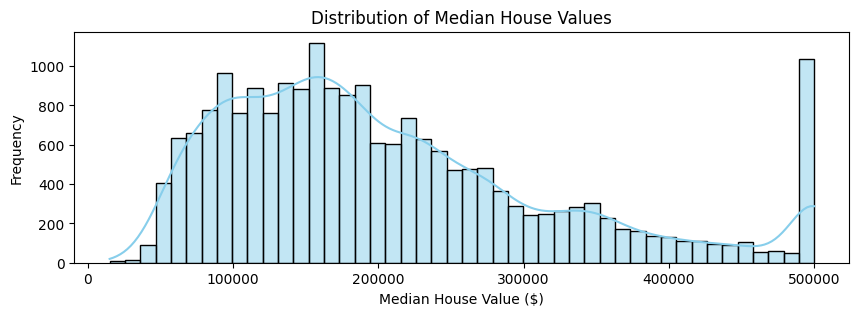

In [139]:
plt.figure(figsize=(10, 3))
sns.histplot(df['median_house_value'], kde=True, color='skyblue')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.show()

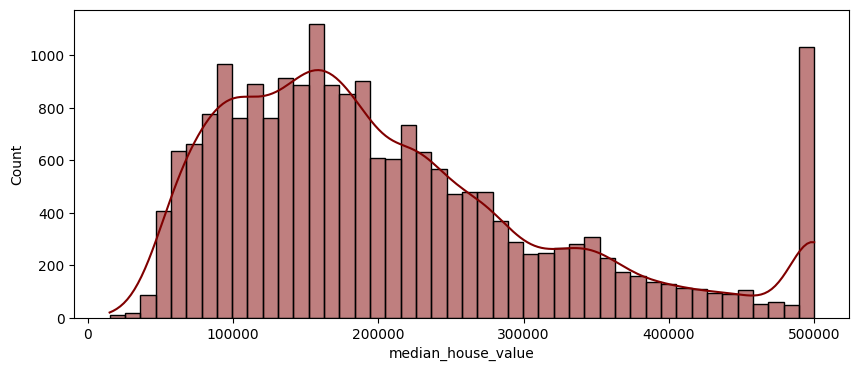

In [150]:
plt.figure(figsize=(10, 4))
sns.histplot(x=df['median_house_value'], kde=True, color='maroon')
plt.show()

C:\Users\Hamna\AppData\Local\Temp\ipykernel_912\4281470878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Binned_median_house_value', data=df,  palette='viridis')


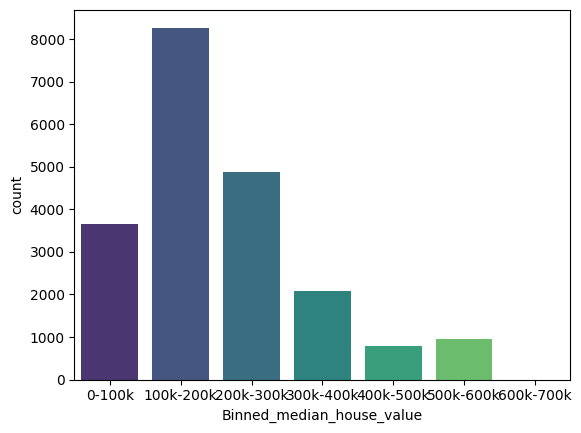

In [159]:
bin_edges=[0,100000,200000,300000, 400000, 500000, 600000, 700000]
bin_labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k']
df['Binned_median_house_value']=pd.cut(df['median_house_value'], bins=bin_edges, labels=bin_labels)
plt.figure()
sns.countplot(x='Binned_median_house_value', data=df,  palette='viridis')
plt.show()

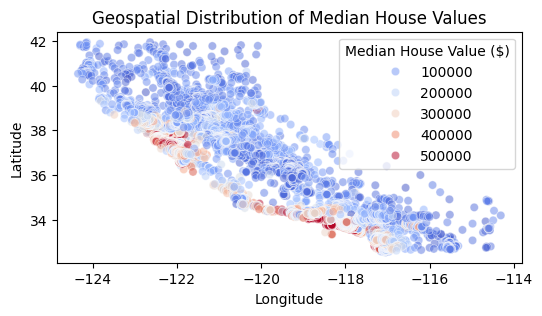

In [161]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='Longitude', y='Latitude', hue='median_house_value', data=df, palette='coolwarm', alpha=0.5)
plt.title('Geospatial Distribution of Median House Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Median House Value ($)')
plt.show()

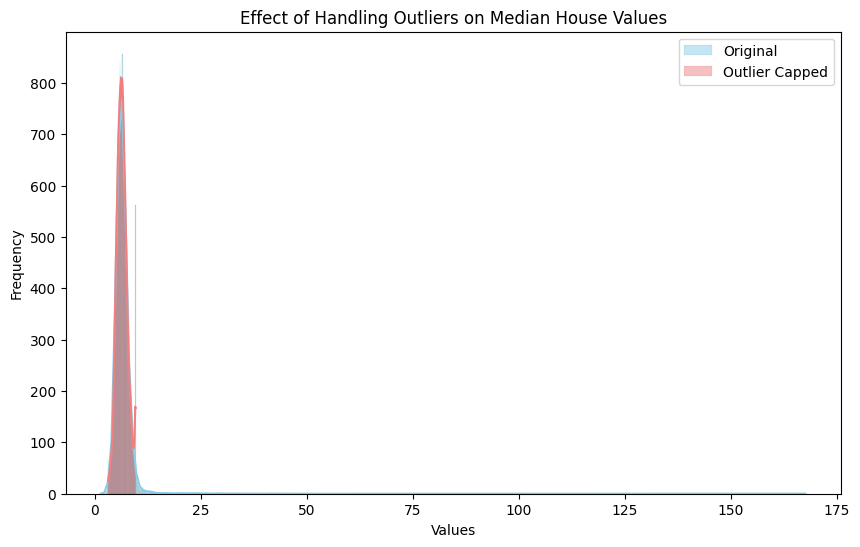

In [162]:
df['total_rooms'] = df['AveRooms'] + df['AveBedrms']
Q1 = df['total_rooms'].quantile(0.25)
Q3 = df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['total_rooms_capped'] = np.clip(df['total_rooms'], lower_bound, upper_bound)

# Distribution after handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['total_rooms'], kde=True, color='skyblue', label='Original')
sns.histplot(df['total_rooms_capped'], kde=True, color='lightcoral', label='Outlier Capped')
plt.title('Effect of Handling Outliers on Median House Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Correlation Matrix of Numerical Features')
plt.show()

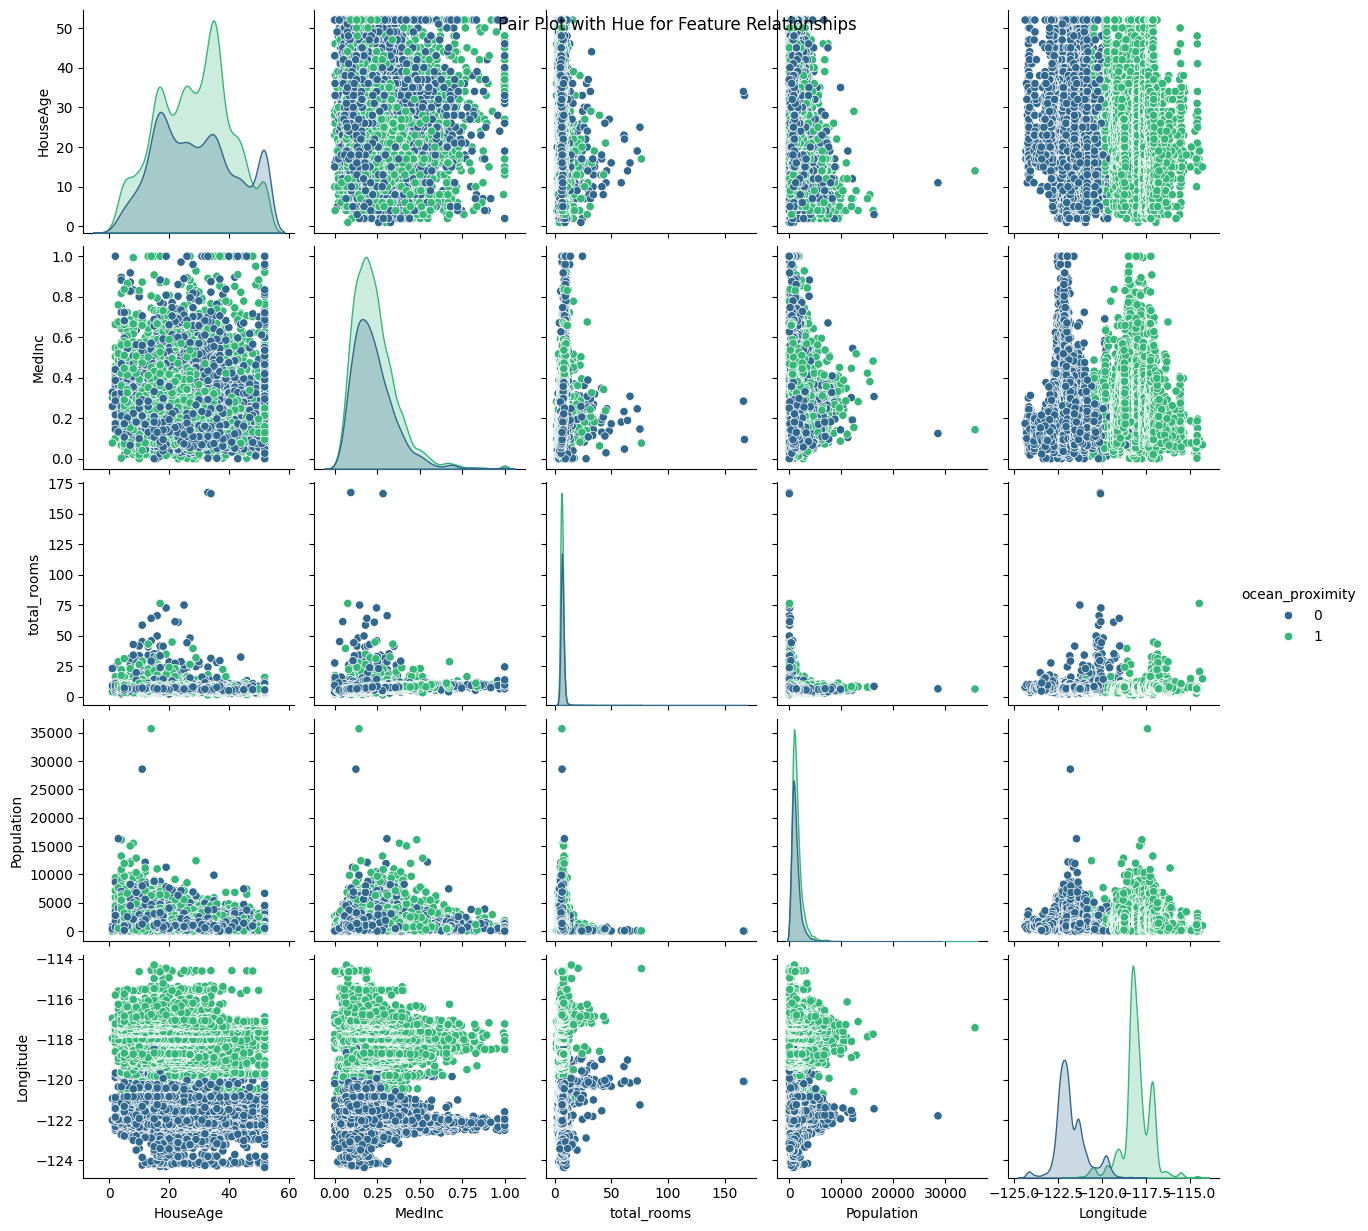

In [165]:
# Select a subset of features for pair plotting
df['ocean_proximity'] = np.where(df['Latitude'] < 36.5, 1, 0)
selected_features = ['HouseAge', 'MedInc', 'total_rooms', 'Population', 'Longitude']

# Include a categorical hue (e.g., 'ocean_proximity') for additional insights
hue_feature = 'ocean_proximity'

# Create the pair plot
sns.pairplot(df[selected_features + [hue_feature]], hue=hue_feature, palette='viridis')
plt.suptitle('Pair Plot with Hue for Feature Relationships')
plt.show()

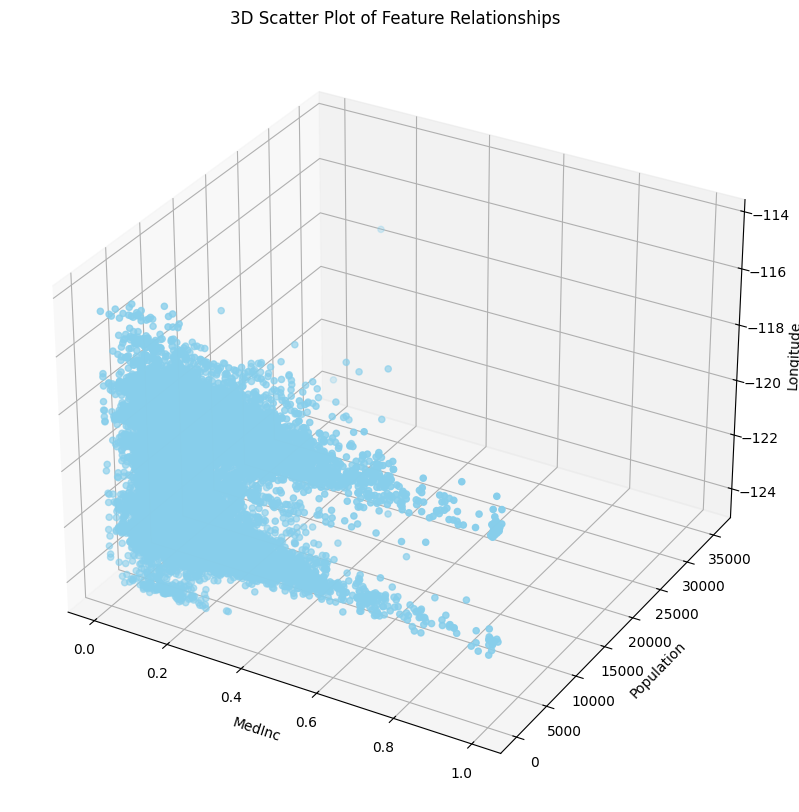

In [166]:
from mpl_toolkits.mplot3d import Axes3D

# Select three numerical features for 3D scatter plot
feature1, feature2, feature3 = 'MedInc', 'Population', 'Longitude'#'HouseAge', 'total_rooms', 

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[feature1], df[feature2], df[feature3], c='skyblue', marker='o')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('3D Scatter Plot of Feature Relationships')
plt.show()

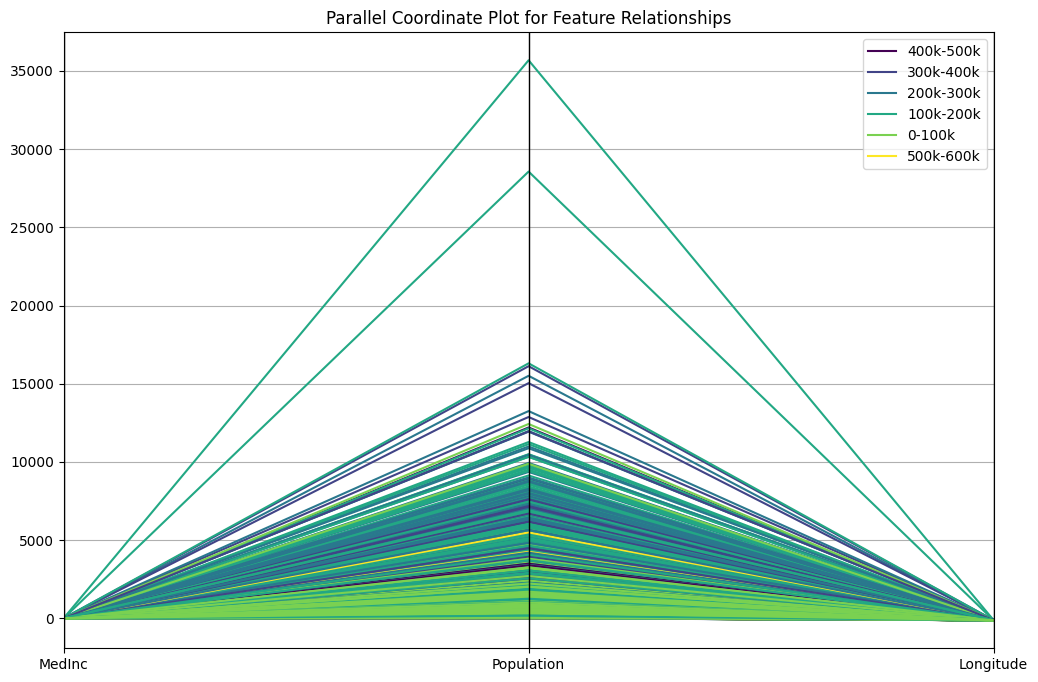

In [168]:
from pandas.plotting import parallel_coordinates

# Select a subset of numerical features for the parallel coordinate plot
selected_features = ['MedInc', 'Population', 'Longitude']#, 'HouseAge', 'total_rooms']

# Include a categorical hue for additional insights
#hue_feature = 'ocean_proximity'
class_column = 'Binned_median_house_value'

# Create the parallel coordinate plot
plt.figure(figsize=(12, 8))
parallel_coordinates(df[selected_features + [class_column]], class_column = class_column, colormap='viridis')
plt.title('Parallel Coordinate Plot for Feature Relationships')
plt.show()